In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Online_Retail.csv')
df = data.copy()

df.head()

,Unnamed: 0.1,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,1,1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [3]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1 , inplace = True)

In [4]:
df.head()
len(df)

541909

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
print(df.shape, '\n', '-' * 50)
print(df.isnull().sum(), '\n', '-' * 50)

df = df.dropna()

print(df.info(), '\n', '-' * 50)
print(df.shape, '\n', '-' * 50)

(541909, 8) 
 --------------------------------------------------
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64 
 --------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB
None 
 --------------------------------------------------
(406829, 8) 
 -----------------------

In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
df.CustomerID = df.CustomerID.astype('str')

In [9]:
df.Quantity.unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     72,    200,    600,
          480,     -6,     14,     -2,     -4,     -5,     -7,     -3,
           11,     70,    252,     60,    216,    384,     27,    108,
           52,  -9360,     75,    270,     42,    240,     90,    320,
           17,   1824,    204,     69,    -36,   -192,   -144,    160,
         2880,   1400,     19,     39,    -48,    -50,     56,     13,
         1440,     -8,     15,    720,    -20,    156,    324,     41,
          -10,    -72,    -11,    402,    378,    150,    300,     22,
           34,    408,    972,    208,   1008,     26,   1000,    -25,
         1488,    250,   1394,    400,    110,    -14,     37,    -33,
      

In [10]:
# Menghitung Monatery/total belanja
df['Amount'] = df.Quantity * df.UnitPrice
rfm_m = df.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [11]:
# Menghitung customer belanja berapa kali
rfm_f = df.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()

# Frequency = jumlah belanja/transaksi
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [12]:
rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')

In [13]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='mixed')

In [14]:
max_date = max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [15]:
df['Diff'] = max_date - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [16]:
rfm_p = df.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()

rfm_p.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [17]:
rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [18]:
rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


Text(0.5, 0, 'Atributes')

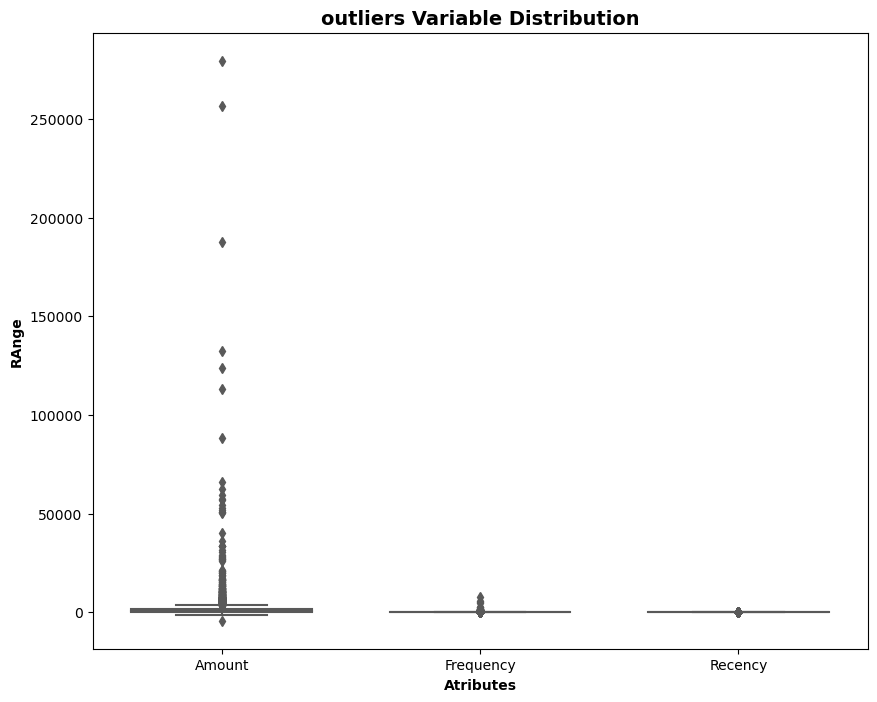

In [19]:
atributes = ['Amount', 'Frequency', 'Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[atributes], orient='v', palette='Set2', whis=1.5,saturation=1,width=0.7)
plt.title("outliers Variable Distribution", fontsize = 14,fontweight = 'bold')
plt.ylabel("RAnge", fontweight = 'bold')
plt.xlabel('Atributes', fontweight = 'bold')

In [20]:
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

In [21]:
from sklearn.preprocessing import StandardScaler

#scaling
rfm_df = rfm[['Amount', 'Frequency', 'Recency']]
scaler = StandardScaler()
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4293, 3)

In [22]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


# Modeling

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [24]:
kmeans.labels_

array([2, 0, 1, ..., 2, 1, 1])

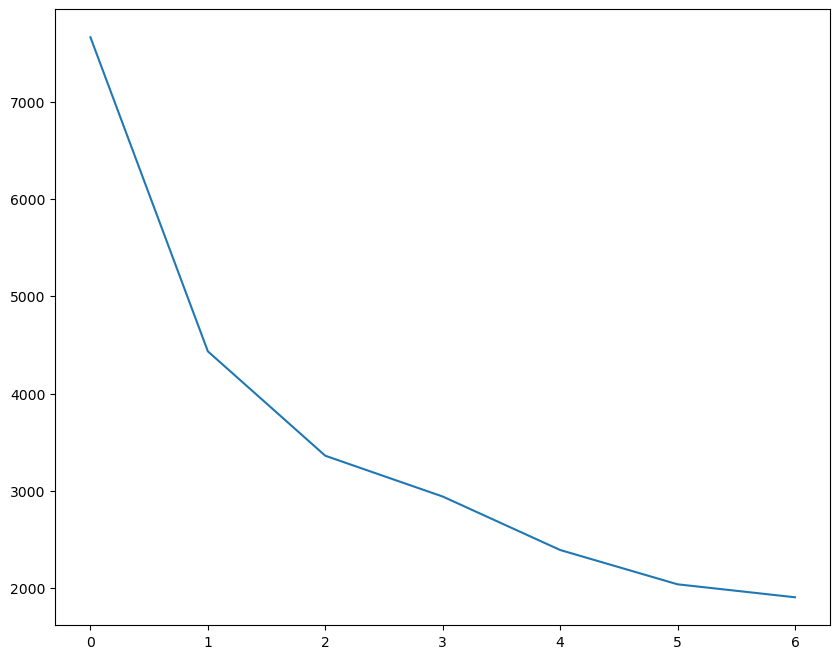

In [25]:
ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)

plt.plot(ssd)

In [26]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2,3,4,5,6,7,8]

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_

    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5415858652525395
For n_clusters=3, the silhouette score is 0.5084896296141937
For n_clusters=4, the silhouette score is 0.4777820100216849
For n_clusters=5, the silhouette score is 0.46569589349368734
For n_clusters=6, the silhouette score is 0.4169757835885474
For n_clusters=7, the silhouette score is 0.4129130150805149
For n_clusters=8, the silhouette score is 0.3294359985733285


In [27]:
kmeans = KMeans(n_clusters=3 , max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [28]:
kmeans.labels_

array([1, 2, 0, ..., 1, 0, 0])

In [29]:
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,2
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,1


<Axes: xlabel='Cluster_Id', ylabel='Amount'>

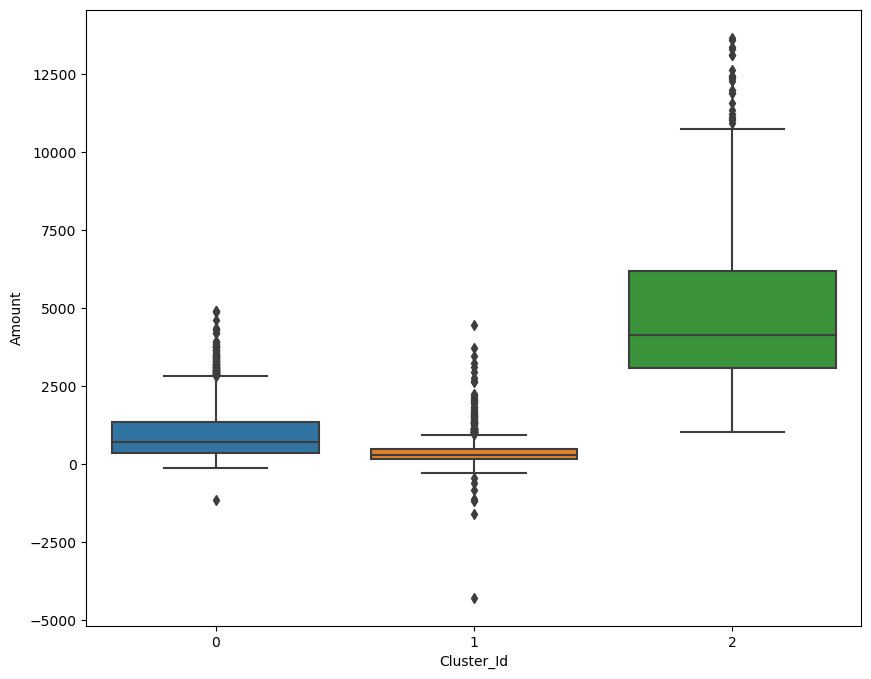

In [30]:
sns.boxplot(x='Cluster_Id', y='Amount', data=rfm)

<Axes: xlabel='Cluster_Id', ylabel='Frequency'>

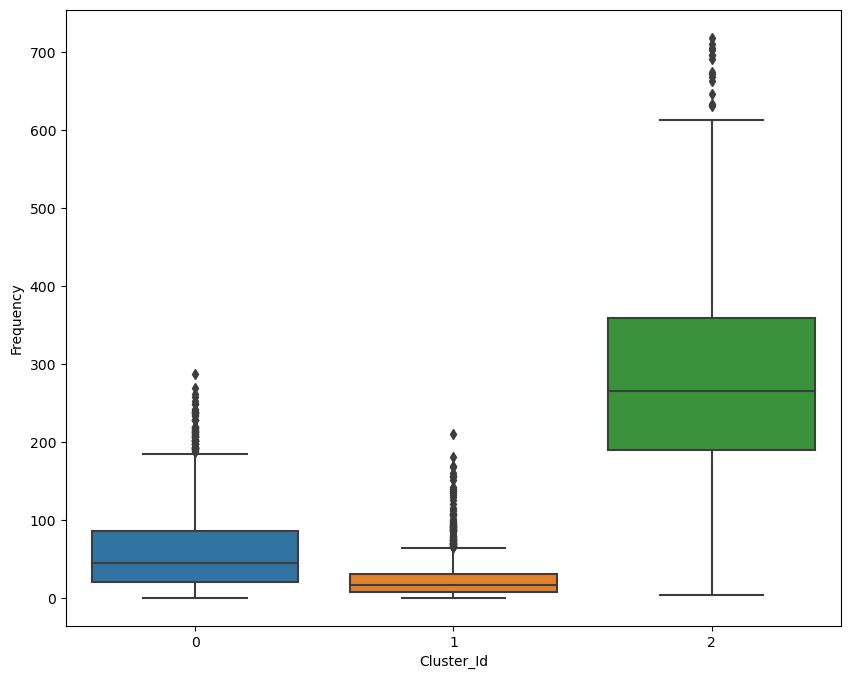

In [31]:
sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)

<Axes: xlabel='Cluster_Id', ylabel='Recency'>

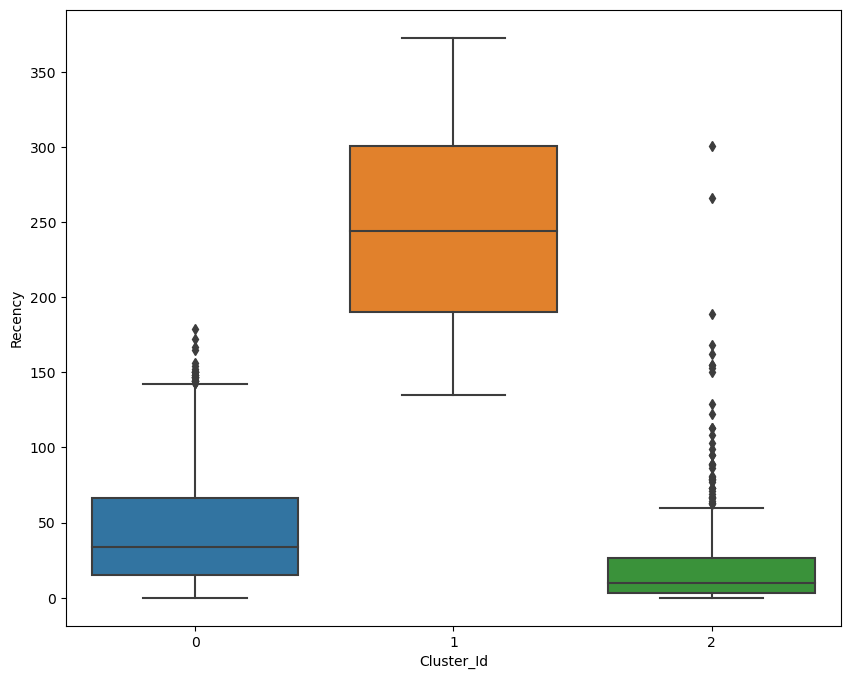

In [32]:
sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)

In [33]:
from scipy.cluster.hierarchy import linkage, dendrogram

linkages = linkage(rfm_df_scaled, method='single', metric='euclidean')

# # Plot dendrogram
# dendrogram(linkages)
# plt.show()

In [34]:
linkages = linkage(rfm_df_scaled, method='complete', metric='euclidean')

# # Plot dendrogram
# dendrogram(linkages)
# plt.show()

In [35]:
linkages = linkage(rfm_df_scaled, method='average', metric='euclidean')

# # Plot dendrogram
# dendrogram(linkages)
# plt.show()

In [36]:
from scipy.cluster.hierarchy import cut_tree

cluster_labels = cut_tree(linkages, n_clusters=3).reshape(-1,)
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
rfm['Cluster_labels'] = cluster_labels
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id,Cluster_labels
0,12346.0,0.00,2,325,1,0
1,12347.0,4310.00,182,1,2,0
2,12348.0,1797.24,31,74,0,0
3,12349.0,1757.55,73,18,0,0
4,12350.0,334.40,17,309,1,0


<Axes: xlabel='Cluster_labels', ylabel='Amount'>

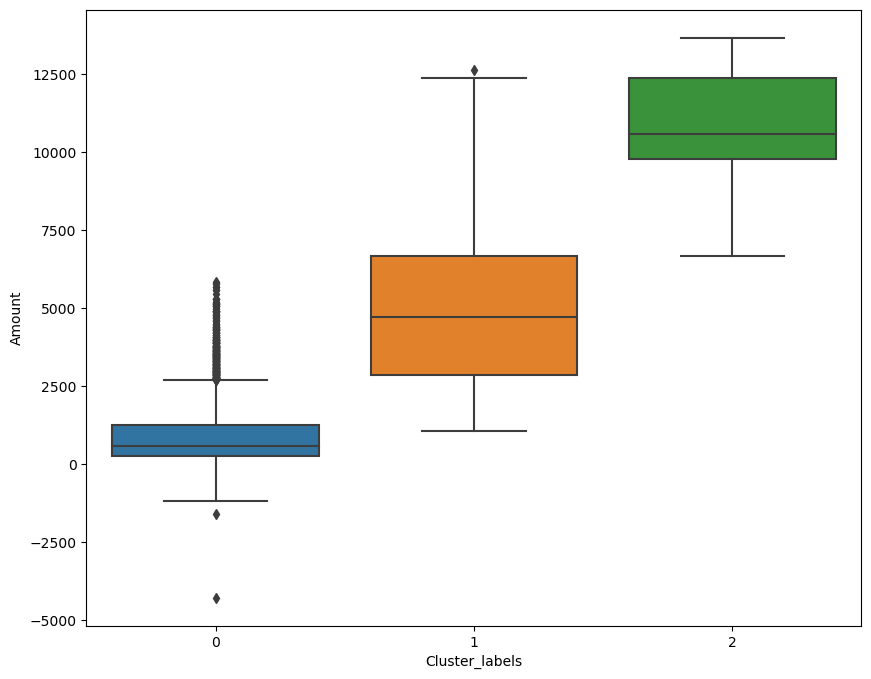

In [38]:
sns.boxplot(x='Cluster_labels', y='Amount', data=rfm)

<Axes: xlabel='Cluster_labels', ylabel='Frequency'>

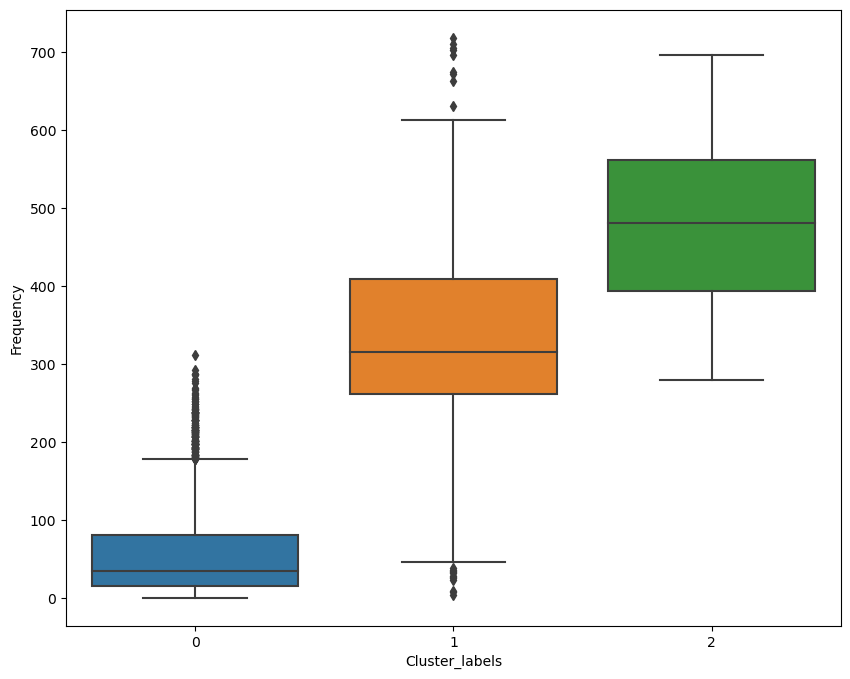

In [39]:
sns.boxplot(x='Cluster_labels', y='Frequency', data=rfm)

<Axes: xlabel='Cluster_labels', ylabel='Recency'>

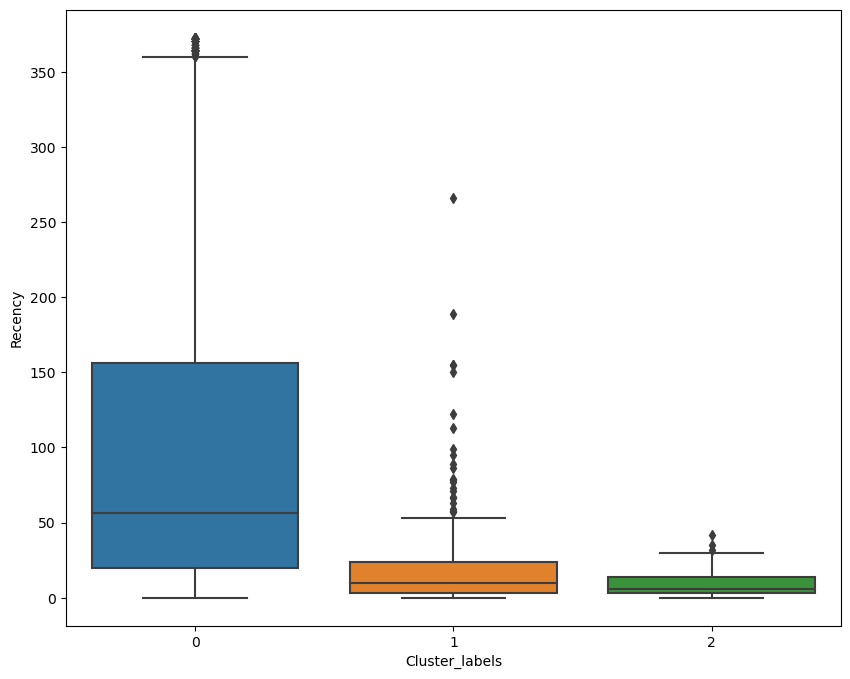

In [40]:
sns.boxplot(x='Cluster_labels', y='Recency', data=rfm)

# Clustering with Scratch

In [41]:
rfm = rfm.drop(['CustomerID','Cluster_labels','Cluster_Id'],axis = 1)

rfm = ((rfm - rfm.min()) / (rfm.max() - rfm.min())) * 10 + 1

In [42]:
# rfm = rfm.sample(n=1000, random_state = 42)

In [43]:
class KMeans:
    def __init__(self, n_clusters, max_iters=100):
        self.n_clusters = n_clusters
        self.max_iters = max_iters

    def fit(self, X):
        # Initialize centroids randomly
        self.centroids = X.iloc[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        
        for _ in range(self.max_iters):
            # Assign each data point to the nearest centroid
            labels = self._assign_labels(X)
            
            # Update centroids
            new_centroids = self._update_centroids(X, labels)
            
            # Check for convergence
            if np.all(self.centroids.values == new_centroids.values):
                break
                
            self.centroids = new_centroids

    def _assign_labels(self, X):
        # Compute distances from each data point to centroids
        distances = np.linalg.norm(X.values[:, np.newaxis] - self.centroids.values, axis=2)
        
        # Assign labels based on the nearest centroid
        return np.argmin(distances, axis=1)
    
    def _update_centroids(self, X, labels):
        new_centroids = pd.DataFrame([X.iloc[labels == i].mean(axis=0) for i in range(self.n_clusters)],
                                      columns=self.centroids.columns)
        return new_centroids
    
    def plot_clusters(data, labels, centroids, iteration, max_iterations):
        pca = CustomPCA(n_components=2)
        data_2d = pca.fit_transform(data)  # Call the method on an instance of CustomPCA
        centroids_2d = pca.transform(centroids.T)
        clear_output(wait=True)
        plt.title(f'Iteration {iteration}/{max_iterations}')
        plt.scatter(x=data_2d[:, 0], y=data_2d[:, 1], c=labels)
        plt.scatter(x=centroids_2d[:, 0], y=centroids_2d[:, 1])
        plt.show()


# Assume 'custom_data' is your own dataset (replace this with your actual dataset)
# custom_data = ...

# Create a K-Means instance with 3 clusters
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(rfm)

# Get cluster assignments for each data point
labels = kmeans._assign_labels(rfm)

print("Cluster Assignments:", labels)
print("Final Centroids:", kmeans.centroids)


Cluster Assignments: [0 2 1 ... 0 1 1]
Final Centroids:      Amount  Frequency   Recency
0  3.631548   1.366839  7.706021
1  3.931257   1.778150  2.221320
2  5.942961   5.097098  1.471882


In [44]:
from IPython.display import clear_output

def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

def plot_clusters(data, labels, centroids, iteration):
        pca = CustomPCA(n_components=2)
        data_2d = pca.fit_transform(data)  # Call the method on an instance of CustomPCA
        centroids_2d = pca.transform(centroids.T)
        clear_output(wait=True)
        plt.title(f'Iteration {iteration}')
        plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
        plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
        plt.show()

class CustomPCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.mean_ = None
        self.components_ = None

    def fit_transform(self, X):
        # Standardize the data (mean=0, variance=1)
        standardized_data = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

        # Calculate the covariance matrix
        covariance_matrix = np.cov(standardized_data, rowvar=False)

        # Calculate the eigenvalues and eigenvectors of the covariance matrix
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

        # Sort the eigenvalues and corresponding eigenvectors in descending order
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]

        # Select the top 'n_components' eigenvectors
        self.components_ = eigenvectors[:, :self.n_components]

        # Project the original data onto the principal components
        transformed_data = np.dot(standardized_data, self.components_)

        return transformed_data
    
    def transform(self, X):
        # Project data onto the principal components
        standardized_data = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
        transformed_data = np.dot(standardized_data, self.components_)

        return transformed_data


labels = get_labels(rfm, centroids)
centroids = random_centroids(rfm, 3)

NameError: name 'centroids' is not defined

In [ ]:
labels.value_counts()

In [ ]:
centroids

In [ ]:
max_iterations = 100
centroid_count = 3

centroids = random_centroids(rfm, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(rfm, centroids)
    centroids = new_centroids(rfm, labels, centroid_count)
    plot_clusters(rfm, labels, centroids, iteration)
    iteration += 1

In [ ]:
kmeans.centroids.T

In [ ]:
def plot_clusters(data, labels, centroids, iteration):
        pca = CustomPCA(n_components=2)
        data_2d = pca.fit_transform(data)  # Call the method on an instance of CustomPCA
        centroids_2d = pca.transform(centroids.T)
        clear_output(wait=True)
        plt.title(f'Iteration {iteration}')
        plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
        plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
        plt.show()
        
max_iterations = 100
centroid_count = 3

centroids = random_centroids(rfm, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(rfm, centroids)
    centroids = new_centroids(rfm, labels, centroid_count)
    plot_clusters(rfm, labels, centroids, iteration)
    iteration += 1

# Kmeans

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(3)
kmeans.fit(rfm)

In [ ]:
features = ['Amount','Frequency','Recency']
pd.DataFrame(kmeans.cluster_centers_, columns=features).T